### Introduction to KNN algorithm

K-Nearest Neighbors (KNN) is a supervised machine learning algorithm used for both classification and regression.
It works by finding the “K” closest data points (neighbours) to a given input and making a prediction based on:
Working principle
- For a new data point, kNN computes the distance (commonly Euclidean) between this point and all training points.
- It selects the k closest neighbors.
- Classification: the class is decided by majority voting among the k neighbors.
- Regression: the output is the average of the neighbors’ values.
- In short, kNN predicts based on similarity to nearby data points in feature space.

### import necessary libraries

In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [55]:
df = pd.read_csv(r"E:\fake_bills.csv",sep=';')
df.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


### the dataset belongs to finance and security domain
### Target variable -> is_genuine where true signifies true bill and false reprresents fake bill 
- target variable contains true/false or 1/0 so we use KNN classifier to predict output
- The features contain distance based feature , small change in distance can change target variable,blls with similar measurement will belong to same class
-  knn will be useful here for predicting accurate class based on closeness of distances 


In [56]:
print(df.shape)

(1500, 7)


In [57]:
df.info

<bound method DataFrame.info of       is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0           True    171.81       104.86        104.95        4.52       2.89   
1           True    171.46       103.36        103.66        3.77       2.99   
2           True    172.69       104.48        103.50        4.40       2.94   
3           True    171.36       103.91        103.94        3.62       3.01   
4           True    171.73       104.28        103.46        4.04       3.48   
...          ...       ...          ...           ...         ...        ...   
1495       False    171.75       104.38        104.17        4.42       3.09   
1496       False    172.19       104.63        104.44        5.27       3.37   
1497       False    171.80       104.01        104.12        5.51       3.36   
1498       False    172.06       104.28        104.06        5.17       3.46   
1499       False    171.47       104.15        103.82        4.63       3.37   

      l

In [58]:
df.columns

Index(['is_genuine', 'diagonal', 'height_left', 'height_right', 'margin_low',
       'margin_up', 'length'],
      dtype='object')

## The dataset contains 1500 rows and 7 columns

### features explanation
- diagonal -> diagonal length of bill
- height_left - height of bill measured on left side
- height_right - height measured on right side
- margin_low - lower margin size
- margin_up - upper margin size
- length - total length of bill 

### Checking missing values

In [60]:
df.isnull().sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

### As our dataset is dense , computing margin_low to middle may change our analysis , so we drop the rows which have missing values

In [61]:
df.dropna(subset=['margin_low'],axis=0,inplace=True)
df.isnull().sum()

## our dataset is clean now 

is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

In [62]:
df.dtypes

is_genuine         bool
diagonal        float64
height_left     float64
height_right    float64
margin_low      float64
margin_up       float64
length          float64
dtype: object

In [63]:
df.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1463.000000,1463.000000,1463.000000,1463.000000,1463.000000,1463.000000
mean,171.959193,104.031333,103.921476,4.485967,3.153083,112.674757
std,0.305457,0.299605,0.324181,0.663813,0.231466,0.873222
min,171.040000,103.140000,102.910000,2.980000,2.270000,109.490000
25%,171.750000,103.825000,103.710000,4.015000,2.990000,112.020000
50%,171.960000,104.040000,103.920000,4.310000,3.140000,112.960000
75%,172.170000,104.230000,104.150000,4.870000,3.315000,113.340000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.320000


## Distribution of target variable

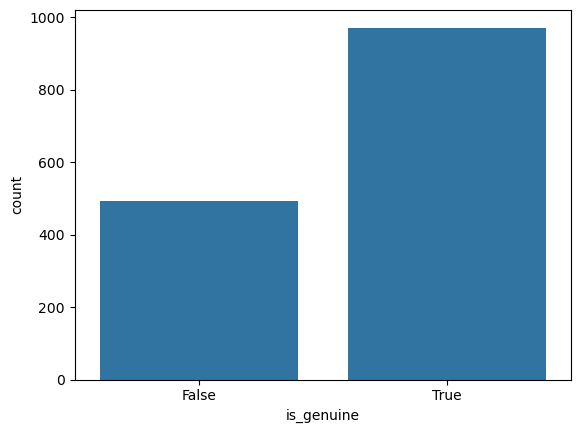

In [64]:
sns.countplot(x=df.is_genuine)
plt.show()
## we can see here that data is unbalanced

### Data visualization
#### Univariate analysis

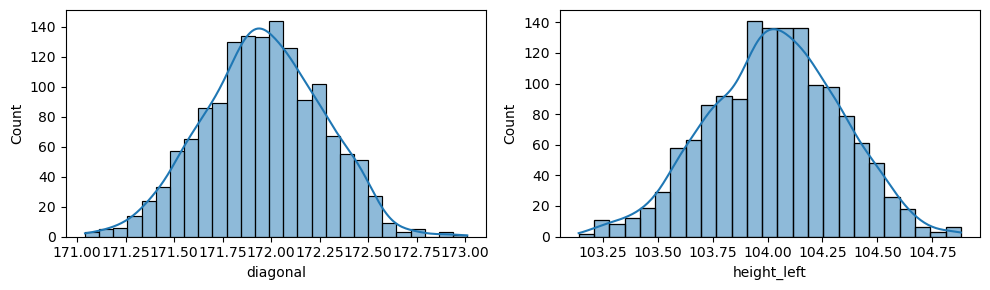

In [65]:
plt.figure(figsize=(10,3))
ax = plt.subplot(1,2,1)
sns.histplot(x=df['diagonal'], kde=True)


ax = plt.subplot(1,2,2)
sns.histplot(x=df['height_left'], kde=True)
plt.tight_layout()
plt.show()



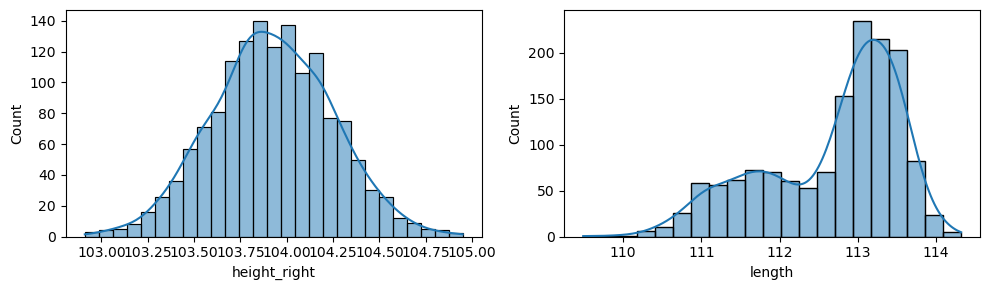

In [66]:
plt.figure(figsize=(10,3))
ax = plt.subplot(1,2,1)
sns.histplot(x=df['height_right'], kde=True)


ax = plt.subplot(1,2,2)
sns.histplot(x=df['length'], kde=True)
plt.tight_layout()
plt.show()

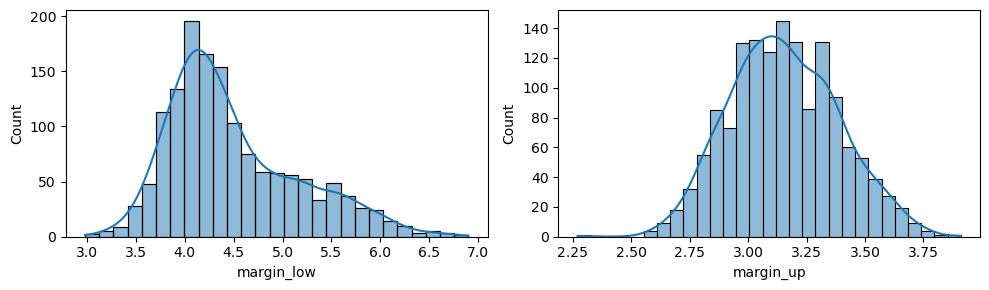

In [67]:
plt.figure(figsize=(10,3))
ax = plt.subplot(1,2,1)
sns.histplot(x=df['margin_low'], kde=True)


ax = plt.subplot(1,2,2)
sns.histplot(x=df['margin_up'], kde=True)
plt.tight_layout()
plt.show()

### Bivariate analysis

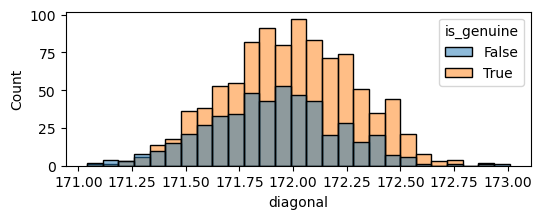

In [68]:
plt.figure(figsize=(6,2))
sns.histplot(data=df, x='diagonal', hue='is_genuine')
plt.show()

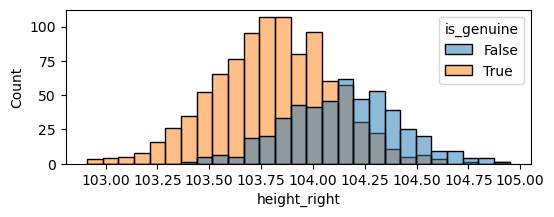

In [69]:
plt.figure(figsize=(6,2))
sns.histplot(data=df, x='height_right', hue='is_genuine')
plt.show()

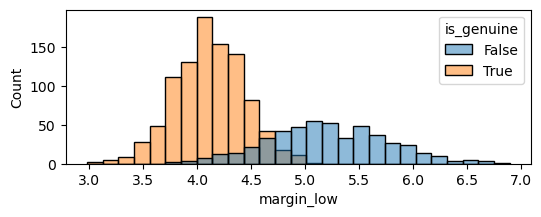

In [70]:
plt.figure(figsize=(6,2))
sns.histplot(data=df, x='margin_low', hue='is_genuine')
plt.show()

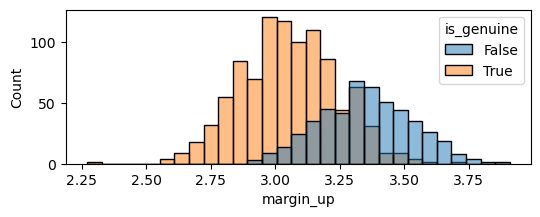

In [71]:
plt.figure(figsize=(6,2))
sns.histplot(data=df, x='margin_up', hue='is_genuine')
plt.show()

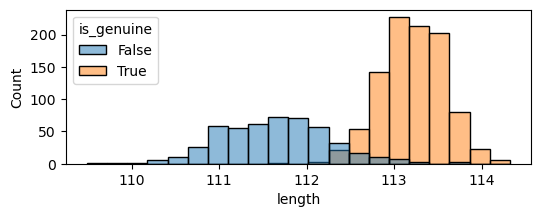

In [72]:
plt.figure(figsize=(6,2))
sns.histplot(data=df, x='length', hue='is_genuine')
plt.show()


### Multivariate analysis

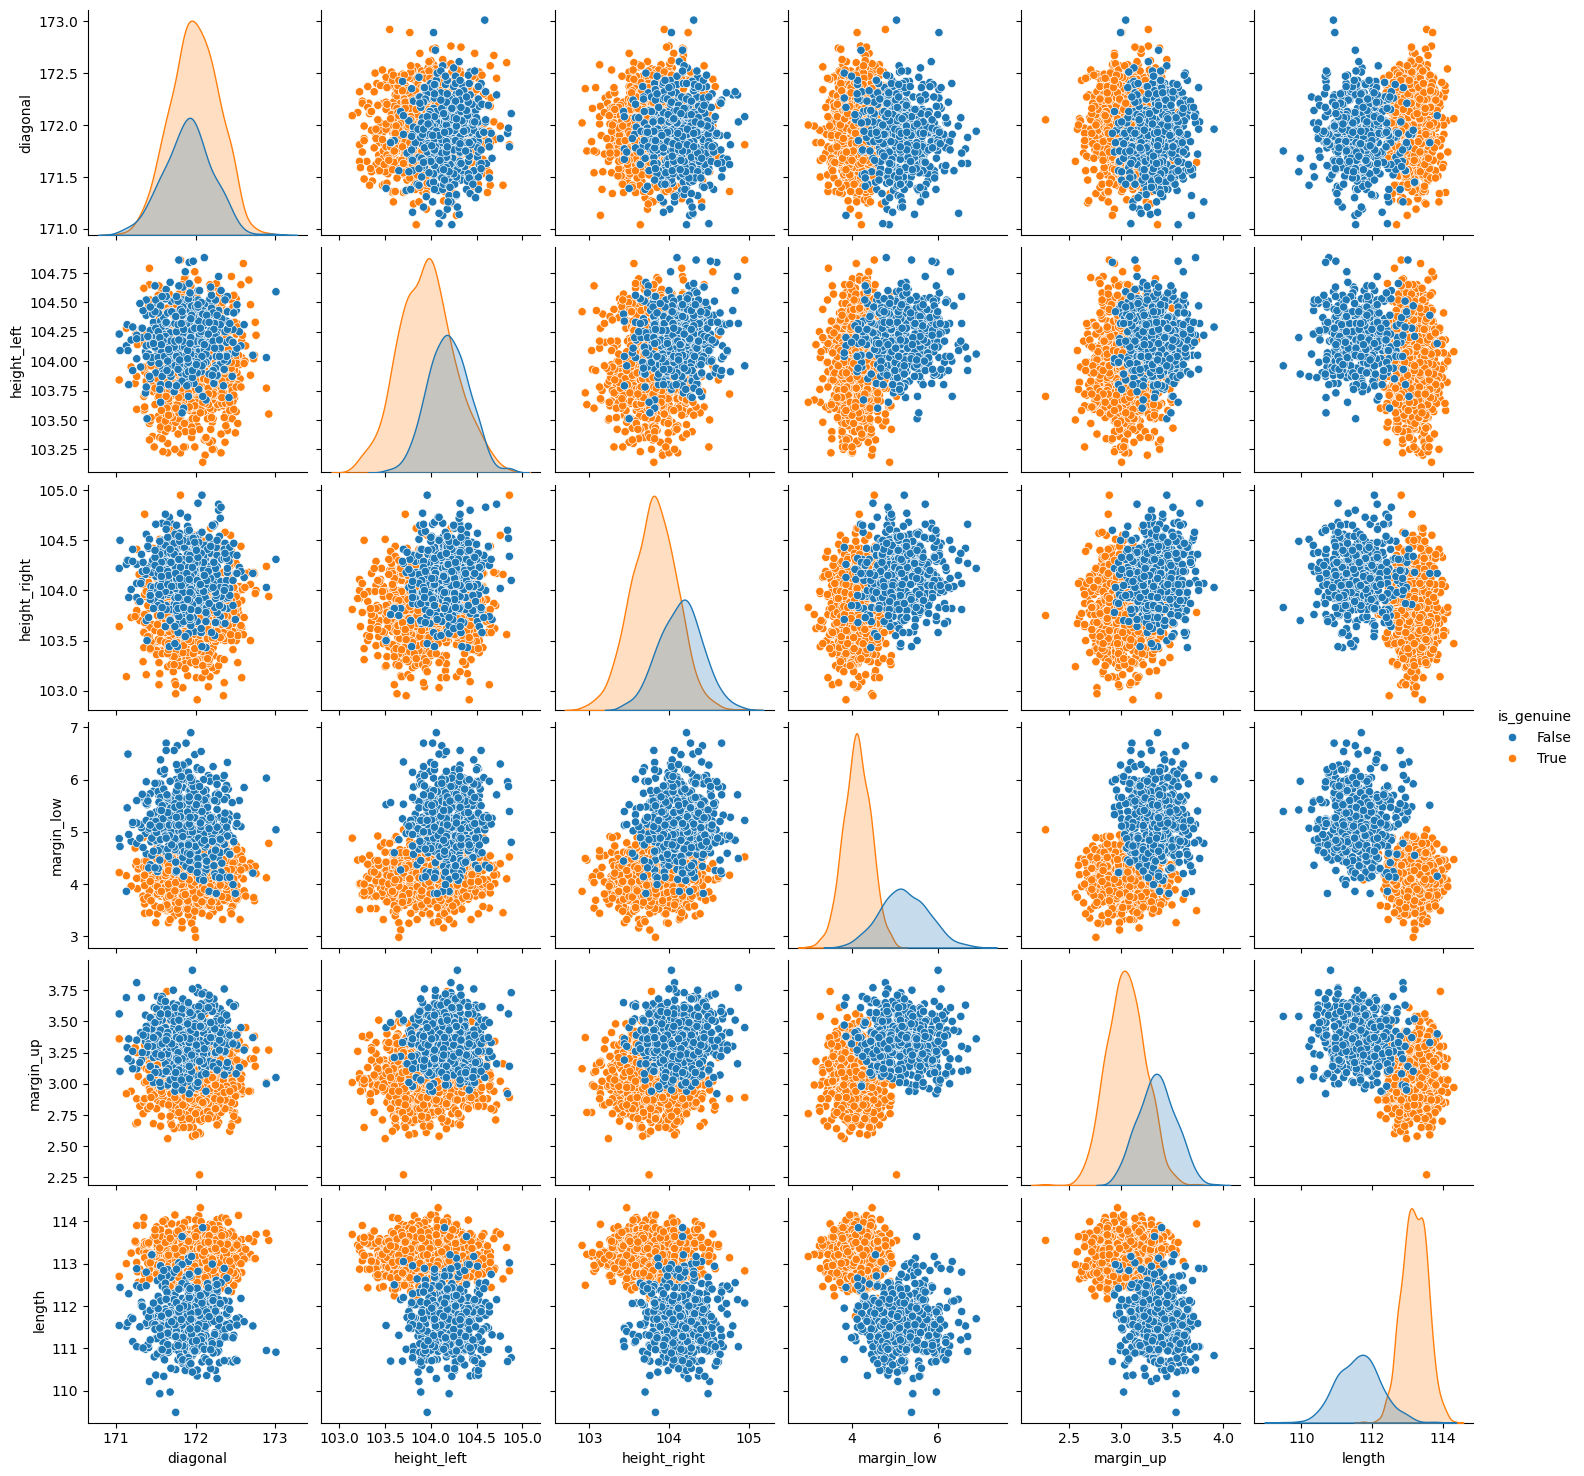

In [73]:
sns.pairplot(df, hue='is_genuine')
plt.show()

### Detecting outliers

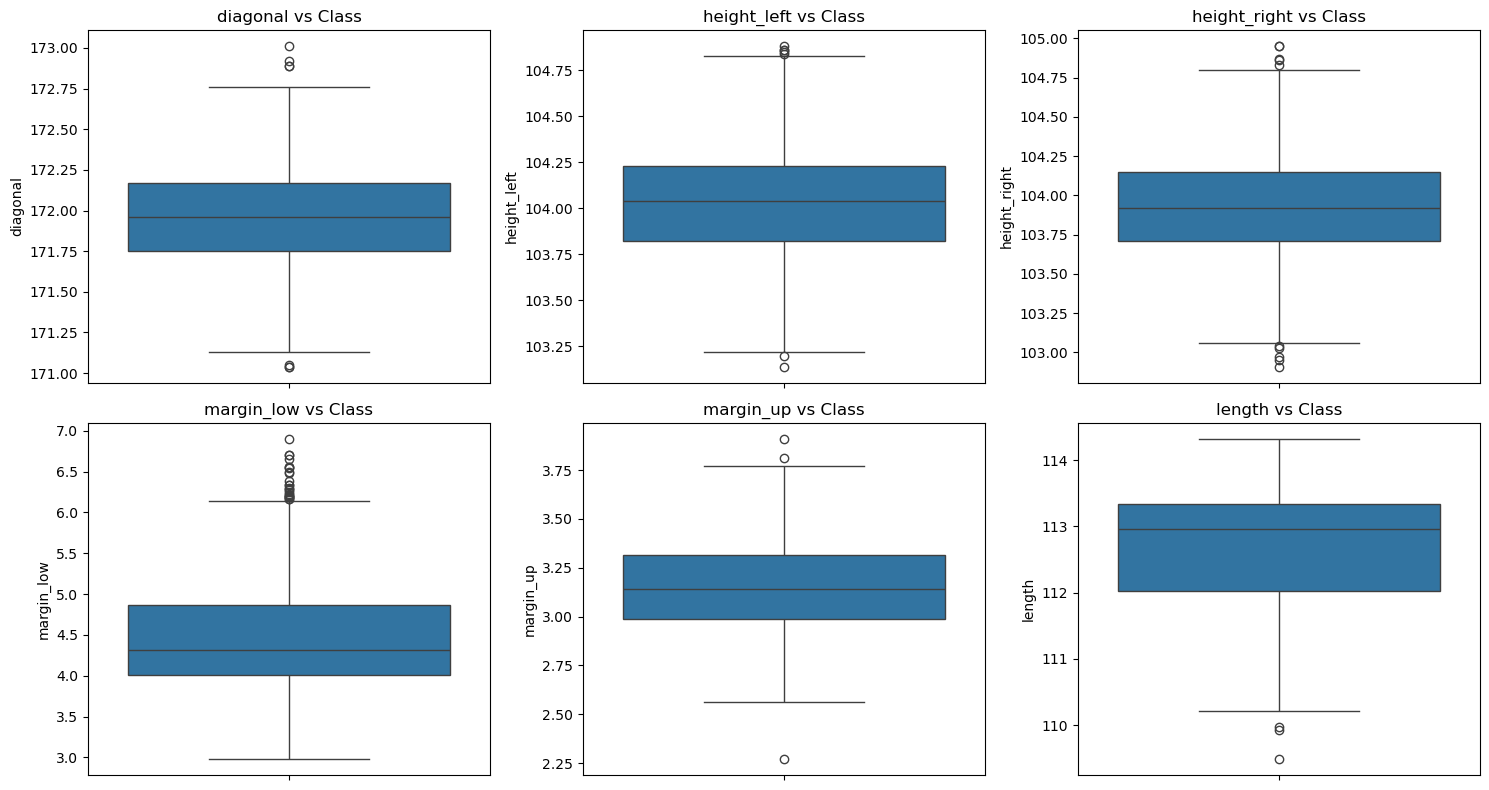

In [74]:

features = ['diagonal', 'height_left', 'height_right', 'margin_low','margin_up', 'length']

plt.figure(figsize=(15, 8))

for i, col in enumerate(features, 1):
    plt.subplot(2, 3, i)   # 2 rows, 3 columns → 6 slots
    sns.boxplot(y=col, data=df)
    plt.title(f'{col} vs Class')

plt.tight_layout()
plt.show()


### Handling outliers 

In [76]:
features = ['diagonal', 'height_left', 'height_right','margin_low', 'margin_up', 'length']

for col in features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df[col] = df[col].clip(lower, upper)


### Seperating target variable and feature matrix

In [78]:
dt = df['is_genuine']
df = df.drop('is_genuine', axis=1)

In [88]:
target_col = pd.DataFrame(dt, 
columns=['is_genuine'])

### Feature Scaling

In [84]:
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler()
dt_scaled = scaling.fit_transform(df)

In [86]:
data_scaled = pd.DataFrame(dt_scaled, 
columns=['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length'])

In [90]:
dt_final = pd.concat([data_scaled,dt],axis=1)
dt_final

,diagonal,height_left,height_right,margin_low,margin_up,length,is_genuine
0,0.410714,1.000000,1.000000,0.485422,0.298077,0.650637,True
1,0.202381,0.087963,0.346591,0.249015,0.375000,0.711600,True
2,0.934524,0.779321,0.255682,0.447597,0.336538,0.728013,True
3,0.142857,0.427469,0.505682,0.201734,0.390385,0.810078,True
4,0.363095,0.655864,0.232955,0.334121,0.751923,0.582640,True
...,...,...,...,...,...,...,...
1495,NaN,NaN,NaN,NaN,NaN,NaN,False
1496,NaN,NaN,NaN,NaN,NaN,NaN,False
1497,NaN,NaN,NaN,NaN,NaN,NaN,False
1498,NaN,NaN,NaN,NaN,NaN,NaN,False


In [94]:
dt_final.dropna(how='any',axis=0,inplace=True)

In [95]:
### Converting categorical data into numerical data 
dt_final['is_genuine'] = dt_final['is_genuine'].astype(int)
dt_final

,diagonal,height_left,height_right,margin_low,margin_up,length,is_genuine
0,0.410714,1.000000,1.000000,0.485422,0.298077,0.650637,1
1,0.202381,0.087963,0.346591,0.249015,0.375000,0.711600,1
2,0.934524,0.779321,0.255682,0.447597,0.336538,0.728013,1
3,0.142857,0.427469,0.505682,0.201734,0.390385,0.810078,1
4,0.363095,0.655864,0.232955,0.334121,0.751923,0.582640,1
...,...,...,...,...,...,...,...
1458,0.375000,0.717593,0.636364,0.453901,0.451923,0.287206,0
1459,0.636905,0.871914,0.789773,0.721828,0.667308,0.214520,0
1460,0.404762,0.489198,0.607955,0.797478,0.659615,0.444302,0
1461,0.559524,0.655864,0.573864,0.690307,0.736538,0.514644,0


### Splitting data into X and y

In [96]:
X = dt_final.drop('is_genuine', axis=1)
y = dt_final.is_genuine

### Training and testing 

In [97]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)

In [98]:
print(X_train.shape)
print(y_test.shape)

(998, 6)
(428,)


### Model Building

In [99]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)

model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

### Make predictions

In [100]:
y_pred = model.predict(X_test)

### Evaluate the model

In [110]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report,roc_curve,roc_auc_score

In [107]:
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))



[[129  11]
 [  7 281]]
0.9579439252336449
0.9623287671232876
0.9756944444444444


In [108]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93       140
           1       0.96      0.98      0.97       288

    accuracy                           0.96       428
   macro avg       0.96      0.95      0.95       428
weighted avg       0.96      0.96      0.96       428



In [111]:
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)


In [113]:
auc_score = roc_auc_score(y_test, y_prob)
print("AUC:", auc_score)


AUC: 0.9803819444444444


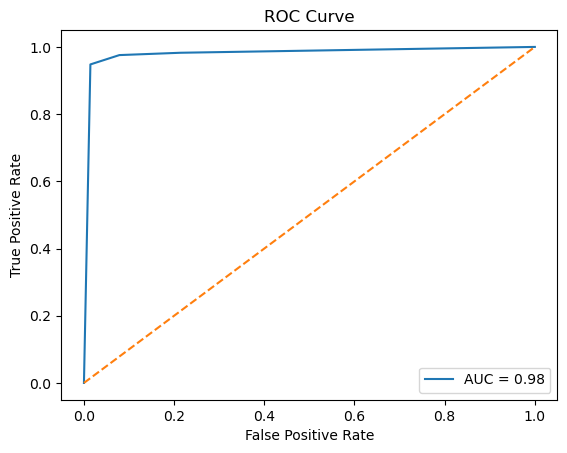

In [114]:
plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')  # random classifier line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

### Hyperparamter Tuning
#### Trying different values of K

In [116]:
error_rate = []

for i in range(2,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

In [117]:
error_rate

[0.04205607476635514,
 0.04205607476635514,
 0.02570093457943925,
 0.02570093457943925,
 0.02336448598130841,
 0.02102803738317757,
 0.02570093457943925,
 0.02336448598130841,
 0.02102803738317757,
 0.02570093457943925,
 0.02102803738317757,
 0.02336448598130841,
 0.02102803738317757,
 0.028037383177570093,
 0.02570093457943925,
 0.02570093457943925,
 0.02570093457943925,
 0.02570093457943925]

### Plotting a graph of K vs error rate

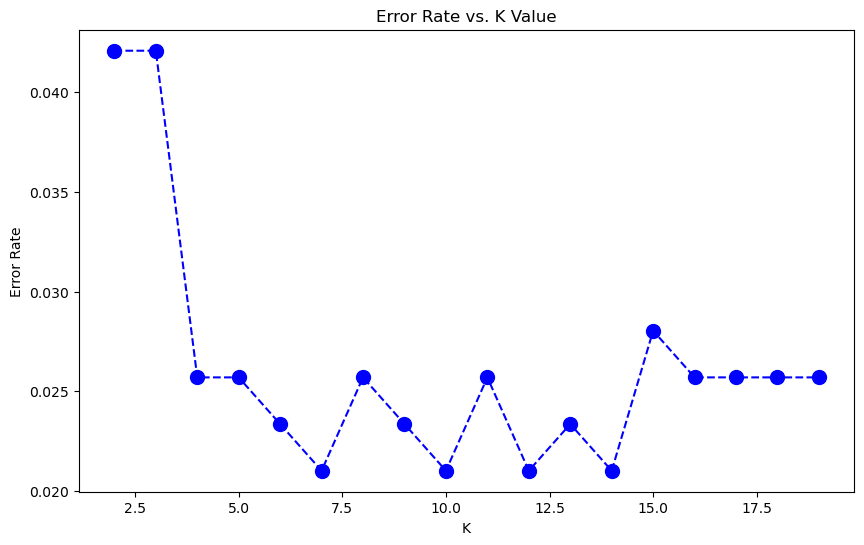

In [118]:
plt.figure(figsize=(10,6))
plt.plot(range(2, 20),error_rate,color='blue', linestyle='dashed', marker='o', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

### When k=7 , error rate is low

In [119]:
model2 = KNeighborsClassifier(n_neighbors=6)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)

In [121]:
from sklearn.model_selection import cross_val_score

### Model building using cross-validation

In [122]:
scores = cross_val_score(model2,X,y,cv=5,scoring='accuracy')

print("Cross-validation accuracy scores:", scores)
print("Mean accuracy:", scores.mean())
print("Std deviation:", scores.std())


Cross-validation accuracy scores: [0.97902098 0.98947368 0.99649123 0.99649123 0.90175439]
Mean accuracy: 0.9726463010673537
Std deviation: 0.03601838990541115


In [120]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       140
           1       0.99      0.98      0.98       288

    accuracy                           0.98       428
   macro avg       0.97      0.98      0.97       428
weighted avg       0.98      0.98      0.98       428



- Accuracy = 98% of all bills are classified correctly
- Macro F1 = 0.97 → model performs well on both fake & genuine
### Balanced, production-worthy model with high precision and recall
